# Bayesian Estimation of Click-Through Rate (CTR): When MAP ≠ MMSE

## 1. Problem context: Online advertising and CTR

In online advertising (e.g., web banners, social media ads, search ads), one key performance metric is the **Click-Through Rate (CTR)**:

$$
\text{CTR} = \frac{\text{number of clicks}}{\text{number of impressions}}.
$$

- An *impression* occurs when the ad is shown to a user.
- A *click* occurs when the user actually clicks on the ad.

We are interested in estimating the **true CTR** of a new ad campaign:
- Let \(\theta\) be the **probability of click per impression** (unknown).
- For each impression, the user either clicks (1) or not (0).

Companies care about $\theta$ because:
- If $\theta$ is high → ad is effective → invest more budget.
- If $\theta$ is low → ad is ineffective → stop or modify the campaign.

However:
- At the beginning of a campaign, we only have **few observations** (few impressions and clicks).
- Purely empirical estimates can be misleading with small data.

We will use **Bayesian estimation** to combine:
1. **Prior knowledge** about typical CTRs in past campaigns.
2. **New data** (impressions and clicks) from the current campaign.

Our goal is to compare:
- **MAP estimator** (Maximum A Posteriori)
- **MMSE estimator** (Minimum Mean Square Error)

and show clearly **when and why they are different**.


## 2. Probabilistic model

### 2.1. Random variable for each impression

We model each impression as a Bernoulli trial:

$$
X_i = 
\begin{cases}
1 & \text{with probability } \theta \quad (\text{click}) \\
0 & \text{with probability } 1-\theta \quad (\text{no click})
\end{cases}
$$

Assume impressions are **independent** and **identically distributed** (i.i.d.).

For $N$ impressions, the total number of clicks is:

$$
K = \sum_{i=1}^N X_i.
$$

Conditioned on $\theta$, we have:

$$
K \mid \theta \sim \text{Binomial}(N, \theta).
$$

So the **likelihood** of observing $K = k$ clicks is:

$$
p(k \mid \theta) = \binom{N}{k} \theta^k (1 - \theta)^{N-k}.
$$

### 2.2. Frequentist (classic) estimator (MLE)

The **Maximum Likelihood Estimator (MLE)** for $\theta$ is:

$$
\hat{\theta}_{\text{MLE}} = \frac{k}{N}.
$$

This estimator ignores any prior knowledge about typical CTRs.

Later we will compare:
- $\hat{\theta}_{\text{MLE}}$
- $\hat{\theta}_{\text{MAP}}$
- $\hat{\theta}_{\text{MMSE}}$


## 3. Bayesian model with Beta prior

### 3.1. Prior knowledge

Suppose from many past campaigns we know that CTRs are usually small, around 2%.  

We model our prior belief about $\theta$ as:

$$
\theta \sim \text{Beta}(\alpha_0, \beta_0).
$$

The $Beta$ distribution is defined on $(0,1)$ and is conjugate to the Binomial, which makes the math simple.

The $Beta(\alpha_0,\beta_0)$ PDF is:

$
p(\theta) = \frac{1}{B(\alpha_0, \beta_0)} \theta^{\alpha_0 - 1} (1 - \theta)^{\beta_0 - 1},
$

where $B(\alpha_0,\beta_0)$ is the $Beta$ function.

The **prior mean** is:

$$
\mathbb{E}[\theta] = \frac{\alpha_0}{\alpha_0 + \beta_0}.
$$

We choose $\alpha_0$ and $\beta_0$ such that:
- Prior mean is approximately 0.02 (2% CTR).
- The prior is moderately concentrated, equivalent to having some "virtual" impressions.

For example, we can take:

$$
\alpha_0 = 2, \quad \beta_0 = 98.
$$

Then:

$$
\mathbb{E}[\theta] = \frac{2}{2+98} = 0.02.
$$

Interpretation:
- This prior behaves almost as if we had observed approximately \(2 + 98 = 100\) "virtual impressions" with 2 clicks.
- It encodes our **prior experience** with similar ads.

### 3.2. Posterior distribution

Given:
- prior $\theta \sim \text{Beta}(\alpha_0, \beta_0)$,
- likelihood $K \mid \theta \sim \text{Binomial}(N, \theta)$,

Bayes’ rule yields a **posterior** which is also Beta:

$$
\theta \mid K=k \sim \text{Beta}(\alpha_N, \beta_N),
$$

with updated parameters:

$$
\alpha_N = \alpha_0 + k, \quad \beta_N = \beta_0 + N - k.
$$

This is a key result: **Beta prior + Binomial likelihood → Beta posterior**.


## 4. MAP and MMSE estimators for a Beta posterior

Let the posterior be:

$$
\theta \mid k \sim \text{Beta}(\alpha_N, \beta_N).
$$

### 4.1. MMSE estimator (posterior mean)

The MMSE estimator (under quadratic loss) is the **posterior mean**:

$$
\hat{\theta}_{\text{MMSE}} = \mathbb{E}[\theta \mid k] = \frac{\alpha_N}{\alpha_N + \beta_N}
= \frac{\alpha_0 + k}{\alpha_0 + \beta_0 + N}.
$$

This estimator averages over all possible values of $\theta$, weighted by their posterior probability.

### 4.2. MAP estimator (posterior mode)

The MAP estimator is the **mode** of the posterior:

For a $Beta(\alpha_N,\beta_N)$ distribution with $\alpha_N > 1$ and $\beta_N > 1$:

$$
\hat{\theta}_{\text{MAP}} = \frac{\alpha_N - 1}{\alpha_N + \beta_N - 2}
= \frac{\alpha_0 + k - 1}{\alpha_0 + \beta_0 + N - 2}.
$$

Note that in general:

$$
\hat{\theta}_{\text{MMSE}} \neq \hat{\theta}_{\text{MAP}}.
$$

They coincide only in special symmetric cases (e.g. when the posterior is symmetric and certain parameter conditions hold).

Our goal is to **show numerically and graphically** that these two estimators differ, especially when the data set is small.


In [1]:
# 5. Imports and basic setup

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Make plots a bit nicer
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["font.size"] = 11


## 5. Prior visualization

We start by visualizing our prior $Beta(\alpha_0, \beta_0)$ with:

- $\alpha_0 = 2$
- $\beta_0 = 98$

This corresponds to a prior mean of 0.02 (2% CTR).


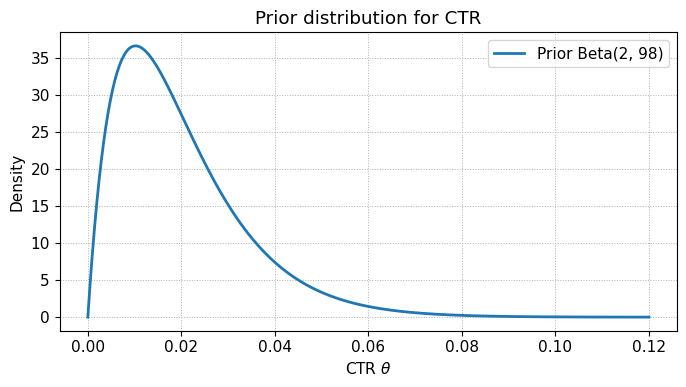

Prior mean CTR = 0.0200 (2.00 %)


In [2]:
# 5.1 Define prior parameters
alpha0 = 2
beta0 = 98

# Grid for theta
theta = np.linspace(0, 0.12, 500)  # we focus on small CTRs (up to 12%)

prior_pdf = beta.pdf(theta, alpha0, beta0)

# Plot prior
plt.figure()
plt.plot(theta, prior_pdf, label=f"Prior Beta({alpha0}, {beta0})", linewidth=2)
plt.xlabel(r"CTR $\theta$")
plt.ylabel("Density")
plt.title("Prior distribution for CTR")
plt.grid(True, linestyle=":", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()

prior_mean = alpha0 / (alpha0 + beta0)
print(f"Prior mean CTR = {prior_mean:.4f} ({100*prior_mean:.2f} %)")


## 6. A small realistic dataset: daily impressions and clicks

Assume we launch a new ad campaign. Each day we observe:
- number of impressions,
- number of clicks.

Below we define a small (synthetic but realistic) dataset for 7 days.


In [3]:
# 6.1 Define a small realistic dataset: impressions and clicks per day
# (Synthetic, but plausible numbers)

days = np.arange(1, 8)

impressions = np.array([120, 200, 150, 300, 400, 500, 600])
clicks      = np.array([  3,   6,   5,   8,  10,  15,  18])

# Compute empirical (daily) CTR
ctr_mle_daily = clicks / impressions

for d, N, k, ctr in zip(days, impressions, clicks, ctr_mle_daily):
    print(f"Day {d}: Impressions = {N:3d}, Clicks = {k:2d}, Empirical CTR (MLE) = {ctr:.4f} ({100*ctr:.2f} %)")


Day 1: Impressions = 120, Clicks =  3, Empirical CTR (MLE) = 0.0250 (2.50 %)
Day 2: Impressions = 200, Clicks =  6, Empirical CTR (MLE) = 0.0300 (3.00 %)
Day 3: Impressions = 150, Clicks =  5, Empirical CTR (MLE) = 0.0333 (3.33 %)
Day 4: Impressions = 300, Clicks =  8, Empirical CTR (MLE) = 0.0267 (2.67 %)
Day 5: Impressions = 400, Clicks = 10, Empirical CTR (MLE) = 0.0250 (2.50 %)
Day 6: Impressions = 500, Clicks = 15, Empirical CTR (MLE) = 0.0300 (3.00 %)
Day 7: Impressions = 600, Clicks = 18, Empirical CTR (MLE) = 0.0300 (3.00 %)


## 7. Posterior update, MAP and MMSE day by day

We now update our belief **day by day**.

- Start with prior $Beta(\alpha_0, \beta_0)$.
- Each day we see $N_d$ impressions and $k_d$ clicks.
- We update the posterior parameters and compute:
  - Posterior mean (MMSE estimator),
  - Posterior mode (MAP estimator),
  - MLE (for comparison).

We also keep a table to examine the differences.


In [4]:
# 7.1 Function to compute posterior parameters, MMSE and MAP

def posterior_params(alpha0, beta0, N, k):
    """
    Given prior Beta(alpha0, beta0) and Binomial data (N, k),
    return posterior alpha_N, beta_N.
    """
    alphaN = alpha0 + k
    betaN = beta0 + (N - k)
    return alphaN, betaN

def mmse_estimator(alphaN, betaN):
    """
    Posterior mean (MMSE estimator).
    """
    return alphaN / (alphaN + betaN)

def map_estimator(alphaN, betaN):
    """
    Posterior mode (MAP estimator) for alphaN > 1 and betaN > 1.
    If conditions are not satisfied, returns NaN.
    """
    if alphaN > 1 and betaN > 1:
        return (alphaN - 1) / (alphaN + betaN - 2)
    else:
        return np.nan

# 7.2 Sequential update

alpha_curr = alpha0
beta_curr = beta0

results = []

for d, N, k in zip(days, impressions, clicks):
    # Likelihood: Binomial(N, theta), with k successes
    alphaN, betaN = posterior_params(alpha_curr, beta_curr, N, k)
    
    # Estimators
    theta_mmse = mmse_estimator(alphaN, betaN)
    theta_map  = map_estimator(alphaN, betaN)
    theta_mle  = k / N if N > 0 else np.nan
    
    results.append({
        "day": d,
        "N": N,
        "k": k,
        "alpha_post": alphaN,
        "beta_post": betaN,
        "MMSE": theta_mmse,
        "MAP": theta_map,
        "MLE": theta_mle
    })
    
    # The posterior of today becomes the prior for tomorrow
    alpha_curr, beta_curr = alphaN, betaN

# 7.3 Print results in a readable format
print("Day |  N   k  |   MLE      MAP      MMSE")
print("---------------------------------------------")
for r in results:
    print(f"{r['day']:3d} | {r['N']:3d} {r['k']:2d} | "
          f"{r['MLE']:.4f}  {r['MAP']:.4f}  {r['MMSE']:.4f}")


Day |  N   k  |   MLE      MAP      MMSE
---------------------------------------------
  1 | 120  3 | 0.0250  0.0183  0.0227
  2 | 200  6 | 0.0300  0.0239  0.0262
  3 | 150  5 | 0.0333  0.0264  0.0281
  4 | 300  8 | 0.0267  0.0265  0.0276
  5 | 400 10 | 0.0250  0.0260  0.0268
  6 | 500 15 | 0.0300  0.0271  0.0277
  7 | 600 18 | 0.0300  0.0279  0.0283


### 7.4. Discussion of the numbers

- **MLE** is just $k/N$ for that day, and depends only on today’s data.
- **MAP** and **MMSE** depend on:
  - the prior,
  - all data accumulated up to that day.

We expect:
- At the beginning (few data), the prior strongly influences the posterior.
- The MMSE and MAP will be **different**, because the Beta posterior is not symmetric in general.
- As data accumulates (large total $N$), both estimators move closer to the MLE and to each other.


## 8. Visualizing prior and posterior for selected days

We now visualize the prior and posterior distributions for:
- Day 1,
- Day 3,
- Day 7,

and mark on each plot:
- the MLE,
- the MAP,
- the MMSE.

This helps students see:
- how the posterior shape changes,
- how MAP and MMSE move and differ.



=== Day 1 ===
Prior:     Beta(2.0, 98.0)
Posterior: Beta(5.0, 215.0)


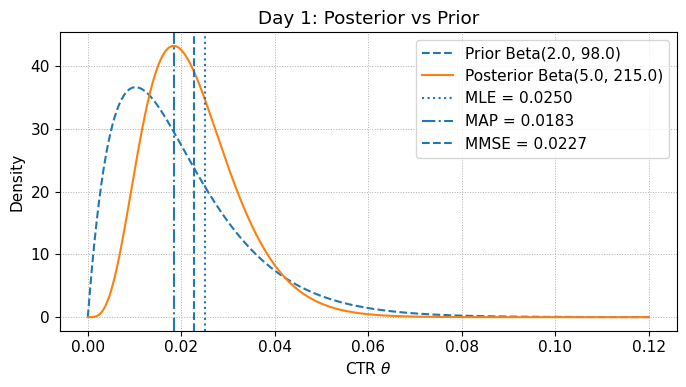


=== Day 3 ===
Prior:     Beta(11.0, 409.0)
Posterior: Beta(16.0, 554.0)


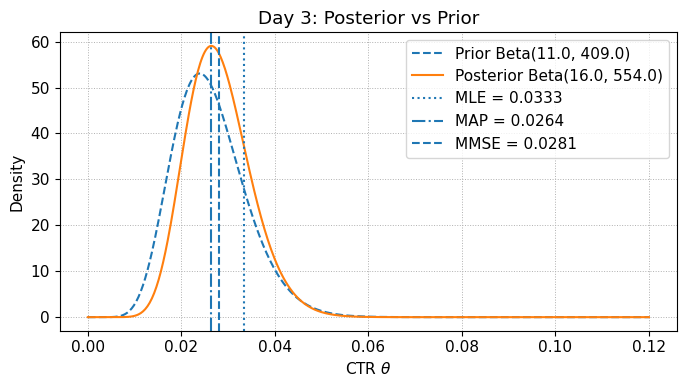


=== Day 7 ===
Prior:     Beta(49.0, 1721.0)
Posterior: Beta(67.0, 2303.0)


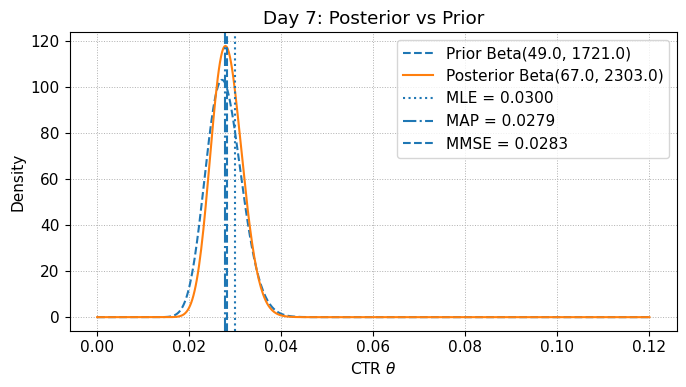

In [7]:
# 8.1 Helper function to plot Beta posterior with markers

def plot_posterior(alpha_post, beta_post, N, k, day, alpha_prior, beta_prior):
    theta_grid = np.linspace(0, 0.12, 500)
    
    prior_pdf  = beta.pdf(theta_grid, alpha_prior, beta_prior)
    post_pdf   = beta.pdf(theta_grid, alpha_post, beta_post)
    
    mmse = mmse_estimator(alpha_post, beta_post)
    mapp = map_estimator(alpha_post, beta_post)
    mle  = k / N if N > 0 else np.nan
    
    plt.figure()
    plt.plot(theta_grid, prior_pdf,  "--", label=f"Prior Beta({alpha_prior:.1f}, {beta_prior:.1f})")
    plt.plot(theta_grid, post_pdf,   "-",  label=f"Posterior Beta({alpha_post:.1f}, {beta_post:.1f})")
    
    # Mark estimators on the posterior
    plt.axvline(mle,  linestyle=":",  label=f"MLE = {mle:.4f}")
    plt.axvline(mapp, linestyle="-.", label=f"MAP = {mapp:.4f}")
    plt.axvline(mmse, linestyle="--", label=f"MMSE = {mmse:.4f}")
    
    plt.xlabel(r"CTR $\theta$")
    plt.ylabel("Density")
    plt.title(f"Day {day}: Posterior vs Prior")
    plt.grid(True, linestyle=":", linewidth=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 8.2 Plot for selected days
# We need the prior parameters *at the beginning of that day*
alpha_prior = alpha0
beta_prior  = beta0
alpha_curr  = alpha0
beta_curr   = beta0

selected_days = [1, 3, 7]

for d, N, k in zip(days, impressions, clicks):
    alpha_post, beta_post = posterior_params(alpha_curr, beta_curr, N, k)
    
    if d in selected_days:
        print(f"\n=== Day {d} ===")
        print(f"Prior:     Beta({alpha_curr:.1f}, {beta_curr:.1f})")
        print(f"Posterior: Beta({alpha_post:.1f}, {beta_post:.1f})")
        plot_posterior(alpha_post, beta_post, N, k, d, alpha_curr, beta_curr)
    
    # Update prior for next day
    alpha_curr, beta_curr = alpha_post, beta_post



## 9. Where exactly do MAP and MMSE differ?

For a Beta posterior $\text{Beta}(\alpha_N, \beta_N)$:

- MMSE:
  $$
  \hat{\theta}_{\text{MMSE}} = \frac{\alpha_N}{\alpha_N + \beta_N}
  $$

- MAP (if $\alpha_N > 1$ and $\beta_N > 1$):
  $$
  \hat{\theta}_{\text{MAP}} = \frac{\alpha_N - 1}{\alpha_N + \beta_N - 2}
  $$

The difference can be written as:

$$
\hat{\theta}_{\text{MMSE}} - \hat{\theta}_{\text{MAP}}
= \frac{\alpha_N}{\alpha_N + \beta_N}
- \frac{\alpha_N - 1}{\alpha_N + \beta_N - 2}.
$$

In general this is **not zero**.

**Intuition:**
- The **MAP** looks only at the **peak** of the posterior.
- The **MMSE** considers the **entire shape** of the posterior (it is an average).

If the posterior is **skewed** (asymmetric), the mode and the mean will be at different points.

In our CTR example:
- With few data, the posterior is strongly influenced by the prior → often skewed.
- Therefore, **MAP ≠ MMSE**.
- As the number of impressions grows, the likelihood dominates, and the posterior becomes more concentrated and less skewed → MAP and MMSE become closer, and both approach the MLE.


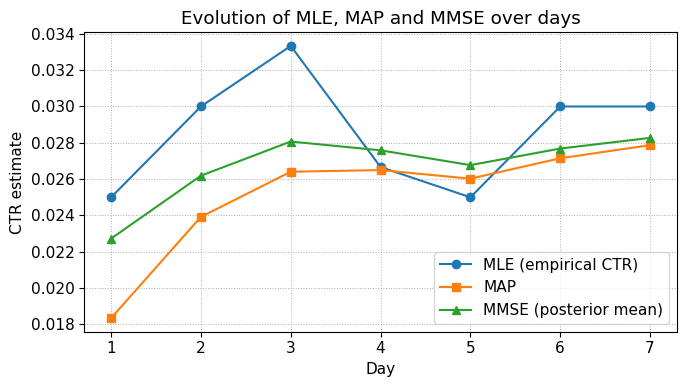

In [9]:
# 10. Plot the evolution of MLE, MAP and MMSE over days

days_list = [r["day"] for r in results]
mle_list  = [r["MLE"] for r in results]
map_list  = [r["MAP"] for r in results]
mmse_list = [r["MMSE"] for r in results]

plt.figure()
plt.plot(days_list, mle_list,  "o-", label="MLE (empirical CTR)")
plt.plot(days_list, map_list,  "s-", label="MAP")
plt.plot(days_list, mmse_list, "^-", label="MMSE (posterior mean)")
plt.xlabel("Day")
plt.ylabel("CTR estimate")
plt.title("Evolution of MLE, MAP and MMSE over days")
plt.grid(True, linestyle=":", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


## 11. Key takeaways

1. **Application context**  
   We studied a real and relevant problem: estimating the **CTR of an ad** in an online campaign.

2. **Modeling**  
   - Each impression is a Bernoulli trial with unknown parameter $\theta$.
   - The total number of clicks over $N$ impressions is Binomial.

3. **Prior knowledge**  
   - Prior $Beta(\alpha_0,\beta_0$) encodes our past experience about typical CTRs.
   - In our example, prior mean = 2% CTR.

4. **Posterior**  
   - Thanks to conjugacy, the posterior is also Beta, with updated parameters:
     $$
     \alpha_N = \alpha_0 + k, \quad \beta_N = \beta_0 + N - k.
     $$

5. **Estimators**  
   - **MLE**: $ \hat{\theta}_{\text{MLE}} = k/N $ (ignores prior).
   - **MMSE**: posterior mean (optimal under squared error).
   - **MAP**: posterior mode (peak of the posterior density).

6. **Why MAP and MMSE differ**  
   - They are different functions of $\alpha_N,\beta_N$.
   - When the posterior is skewed (typical with small or moderate data), the mean and mode do **not** coincide.
   - Therefore, **MAP ≠ MMSE** in general.

7. **Asymptotic behavior**  
   - As the number of impressions $N$ grows large:
     - The data dominates the prior.
     - The posterior becomes more concentrated around the true value.
     - **MAP, MMSE, and MLE become very close.**

8. **Practical message**  
   - For **small datasets**, the choice between MAP and MMSE can matter.
   - In some contexts, MMSE (posterior mean) is preferred for its decision-theoretic optimality under squared error.
   - In others, MAP can be more intuitive (e.g., “most probable” value).
